# Analysing Fandango movie ratings

Fandango, a movie ratings company, has been previously accused of biasing movie ratings (with evidence: https://fivethirtyeight.com/features/fandango-movies-ratings/).
Fandango has claimed that this was the result of a bug in their rating system rather than an intentional mischief.
In this project, we will analyse newer movie ratings and find out what has changed on the website and, if Fandango holds true to their word or not.

The old data is the one collected by Walt Hickey and made publicly available on GitHub: https://github.com/fivethirtyeight/data/tree/master/fandango

The newer ratings data is from the period 2016-2017, collected by the Dataqest team.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data collected and analysed by Hickey
fd_sc = pd.read_csv('fandango_score_comparison.csv')
# Data collected by Dataquest team for this projected
mov_rat = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
fd_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [4]:
fd_sc.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,...,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,...,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,...,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,...,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,...,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,...,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,...,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


In [5]:
mov_rat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [6]:
mov_rat.describe()

,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,2016.107477,53.266355,6.440654,53.621495,58.626168,3.894860,2.663318,3.220327,2.681075,2.931308,2.658879,3.214953,2.691589,2.915888
std,0.310444,17.843585,1.030056,30.242396,21.100040,0.516781,0.892179,0.515028,1.512120,1.055002,0.924619,0.526803,1.519273,1.060352
min,2016.000000,11.000000,3.500000,0.000000,11.000000,2.500000,0.550000,1.750000,0.000000,0.550000,0.500000,2.000000,0.000000,0.500000
25%,2016.000000,39.000000,5.825000,27.000000,43.250000,3.500000,1.950000,2.912500,1.350000,2.162500,2.000000,3.000000,1.500000,2.000000
50%,2016.000000,53.500000,6.500000,56.500000,60.500000,4.000000,2.675000,3.250000,2.825000,3.025000,2.500000,3.000000,3.000000,3.000000
75%,2016.000000,66.000000,7.200000,83.000000,76.750000,4.500000,3.300000,3.600000,4.150000,3.837500,3.500000,3.500000,4.000000,4.000000
max,2017.000000,99.000000,8.500000,99.000000,93.000000,5.000000,4.950000,4.250000,4.950000,4.650000,5.000000,4.000000,5.000000,4.500000


In [7]:
old_data = fd_sc[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
new_data = mov_rat[['movie', 'year', 'fandango']]

In [8]:
old_data.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [9]:
new_data.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


The population of interest for this project is all the movie ratings in Fandango's database. The data collected by Hickey had the following criteria:
- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015)
- The movie must have had tickets on sale in 2015

This was not random sampling because not every movie matched the criteria.
Similarly the criteria for the samples pulled in the second set were:
- The movie must have been released in 2016 or later
- The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data)

Clearly, the newer sample is not representative of the older sample.

Keeping this in mind, our goal now is to see the differences in the ratings of popular movies in 2015 and in 2016.

We'll follow Hickey's criteria and define a popular movie as one having at least 30 fan ratings on Fandango. Let's check if the new data is representatvie or not.

In [10]:
new_data.sample(10, random_state=100)

,movie,year,fandango
117,Morgan,2016,3.5
163,The Boss,2016,3.5
145,Skiptrace,2016,3.5
134,Pride and Prejudice and Zombies,2016,4.0
112,Misconduct,2016,3.0
74,I.T.,2016,3.5
126,Office Christmas Party,2016,3.5
65,Hacksaw Ridge,2016,4.5
181,The Infiltrator,2016,4.0
110,Mike and Dave Need Wedding Dates,2016,4.0


As of May 2019, these mavies have these many ratings:

| Movies  |  No. of ratings |
|---|---|
| Morgan  | 674 |
| The Boss  | 5523 |
| Skiptrace  | 4 |
| Pride and Prejudice and Zombies  | 1818 |
| Misconduct  | 23 |
| I.T.  | 10 |
| Office Christmas Party  | 2700 |
| Hacksaw Ridge  | 6611 |
| The Infiltrator  | 1812 |
| Mike and Dave Need Wedding Dates  | 2718 |

70% of them are popular by our definition, which is ok.

Let's extract the movies released in 2015 and 2016 from the old and new data respectively

In [11]:
year_2015 = [1 if x.endswith('(2015)') else 0 for x in old_data['FILM']]
old_data['2015'] = year_2015
# dataframe of movies released in 2015
mov_2015 = old_data[old_data['2015'] == 1].drop('2015',axis=1)

C:\Users\Sudeep\Miniconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
# dataframe of movies released in 2016
mov_2016 = new_data[new_data['year'] == 2016]

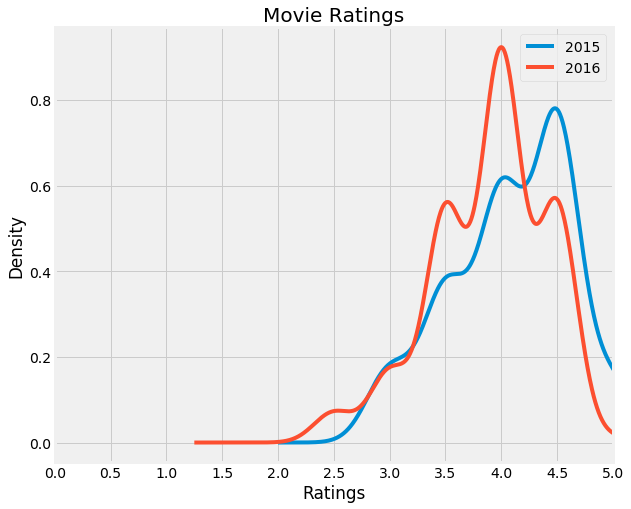

In [13]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
mov_2015['Fandango_Stars'].plot.kde(label='2015',legend=True)
mov_2016['fandango'].plot.kde(grid=True,label='2016',legend=True)
plt.title('Movie Ratings', fontsize=20)
plt.xlabel('Ratings')
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

We can make some inferences from this graph:
*   Both are strongly left skewed
*   Older data is more left skewed than newer data
*   Newer data has more averagely rated rated movies than older data
*   All this seems to suggest lesser bias towards higher rated movies



Let's look at the frequency distribution of these two samples. Since the sample size is different for both datasets, to make a proper judgement we need to take relative frequencies into account. We can visualise this for clarity.

In [15]:
mov_2015['Fandango_Stars'].value_counts(normalize=True)*100

4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
5.0     6.976744
Name: Fandango_Stars, dtype: float64

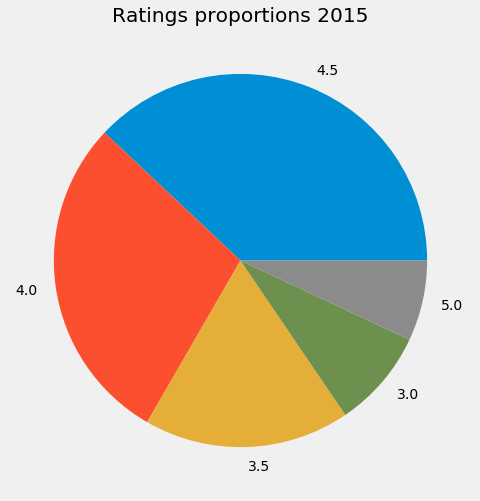

In [16]:
mov_2015['Fandango_Stars'].value_counts().plot.pie(figsize=(10,8))
plt.title('Ratings proportions 2015')
plt.ylabel('')
plt.show()

In [17]:
mov_2016['fandango'].value_counts(normalize=True)*100

4.0    40.314136
4.5    24.607330
3.5    24.083770
3.0     7.329843
2.5     3.141361
5.0     0.523560
Name: fandango, dtype: float64

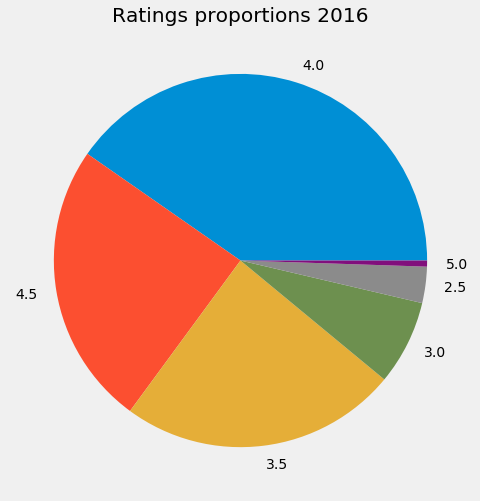

In [18]:
mov_2016['fandango'].value_counts().plot.pie(figsize=(10,8))
plt.title('Ratings proportions 2016')
plt.ylabel('')
plt.show()

The distribution of ratings are heavily favoured towards 4.5 and 4.0 stars. However, in 2015 there are a lot more 4.5 rated movies than 4.0 rated ones and this distribution flips in 2016. There is also a much larger presence of 5.0 rated movies in 2015.

To investigate further, we'll look at some descriptive statistics and see what we can find out.

mean_2015 = mov_2015['Fandango_Stars'].mean()
median_2015 = mov_2015['Fandango_Stars'].median()
mode_2015 = mov_2015['Fandango_Stars'].mode()[0]
mean_2016 = mov_2016['fandango'].mean()
median_2016= mov_2016['fandango'].median()
mode_2016 = mov_2016['fandango'].mode()[0]

In [20]:
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


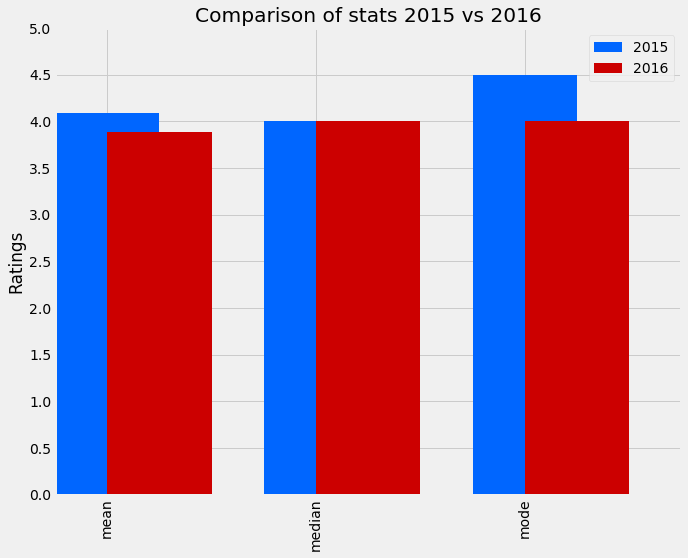

In [21]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', label='2015')
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label='2016')
plt.title('Comparison of stats 2015 vs 2016')
plt.legend()
plt.yticks(np.arange(0,5.1,0.5))
plt.ylabel('Ratings')
plt.show()

**Conclusion:**
There has been a definitive change in ratings. We see that the average ratings of popular movies have reduced a bit and the most occuring ratings have lessened quite a bit between the old and new sets of data. This suggests that Fandango has had made some changes in its system and now it is suggestively less biased than before.